# Task 1

---

## Web scraping and analysis



In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Terrible overall, medium ser..."
1,✅ Trip Verified | London Heathrow to Male In...
2,Not Verified | Very good flight following an ...
3,Not Verified | An hour's delay due to late ar...
4,✅ Trip Verified | I booked through BA becaus...


In [ ]:
df.to_csv("data1/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
pip install pandas nltk

Note: you may need to restart the kernel to use updated packages.


Clean the data :

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yassin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yassin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yassin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Load the CSV file
df = pd.read_csv('data1\BA_reviews.csv')

# Remove unnecessary columns 
df = df[['reviews']]

# Handle missing values (remove rows with missing values)
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove leading and trailing whitespace or tabulation
df['reviews'] = df['reviews'].str.strip()

# Remove reviews that start with "Not Verified"
df = df[~df['reviews'].str.startswith("Not Verified")]

# Remove "✅ Trip Verified |" string
df['reviews'] = df['reviews'].str.replace("✅ Trip Verified |", "")

# Remove leading and trailing whitespace or tabulation
df['reviews'] = df['reviews'].str.strip()

# Convert text to lowercase
df['reviews'] = df['reviews'].str.lower()

# Remove special characters and punctuation
df['reviews'] = df['reviews'].str.replace('[{}]'.format(string.punctuation), '')

# Tokenize text
df['reviews'] = df['reviews'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize words
lemmatizer = WordNetLemmatizer()
df['reviews'] = df['reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join tokens back into strings
df['reviews'] = df['reviews'].apply(lambda x: ' '.join(x))

# Save the cleaned data to a new CSV file
df.to_csv('data1/BA_reviews_cleaned.csv', index=False)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\yassin/nltk_data'
    - 'c:\\Users\\yassin\\anaconda3\\nltk_data'
    - 'c:\\Users\\yassin\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\yassin\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\yassin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Sentiment Analysis

In [ ]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for nltk>=3.9 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   -- ------------------------------------- 41.0/624.3 kB 2.0 MB/s eta 0:00:01
   --- ----------------------------------- 61.4/624.3 kB 656.4 kB/s eta 0:00:01
   ---- ---------------------------------- 71.7/624.3 kB 491.5 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/624.3 kB 525.1 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/624.3 kB 654.6 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/624.3 kB 734.2 kB/s eta 0:00:01
   ---------------- --------------------- 276.5/62

In [ ]:
from textblob import TextBlob

# Function to get the sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Apply the function to the reviews
df['sentiment'] = df['reviews'].apply(get_sentiment)

# Classify sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Save the sentiment data to a new CSV file
df.to_csv('data1/BA_reviews_sentiment.csv', index=False)

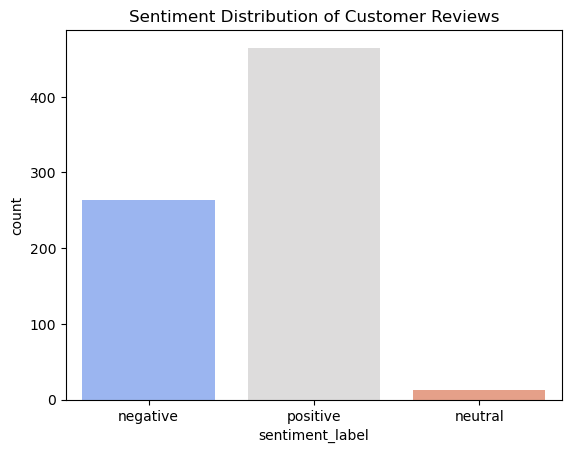

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('data1/BA_reviews_sentiment.csv')

sns.countplot(x=df['sentiment_label'], palette="coolwarm")
plt.title("Sentiment Distribution of Customer Reviews")
plt.show()


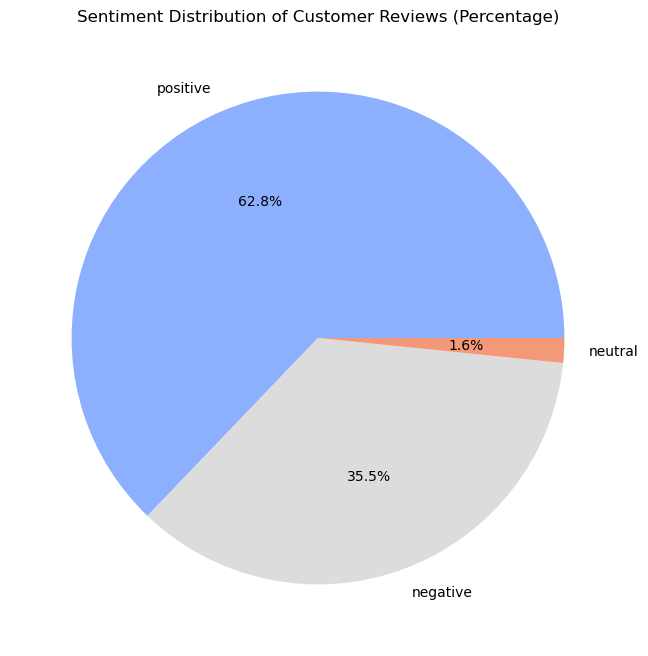

In [ ]:
# Calculate the percentage of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts(normalize=True) * 100

# Convert the Series to a DataFrame for easier plotting
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment_label', 'percentage']

# Create a pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(sentiment_df['percentage'], labels=sentiment_df['sentiment_label'], autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(sentiment_df)))
plt.title("Sentiment Distribution of Customer Reviews (Percentage)")
plt.show()

main topics discussed in the reviews:

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Vectorize the reviews
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['reviews'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Get the topic distribution for each document
topic_distribution = lda.transform(X)

# Get the dominant topic for each document
dominant_topic = topic_distribution.argmax(axis=1)

# Create a DataFrame with the dominant topic for each document
df['Dominant Topic'] = dominant_topic



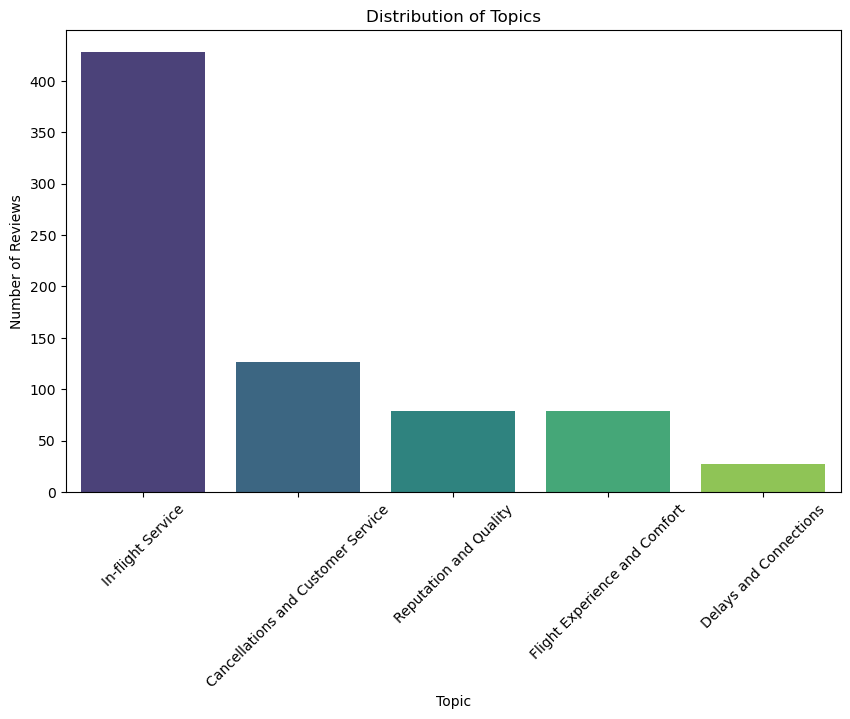

In [ ]:
# Assign labels to each topic
#this labels are based on the most common words in each topic
topic_labels = {
    0: 'Flight Experience and Comfort',
    1: 'Cancellations and Customer Service',
    2: 'In-flight Service',
    3: 'Delays and Connections',
    4: 'Reputation and Quality'
}

# Map the topic labels to the dominant topic
df['Topic Label'] = df['Dominant Topic'].map(topic_labels)

# Plot the distribution of the topics
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Topic Label', order=df['Topic Label'].value_counts().index, palette='viridis')
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()